# 3D Spacetime Diagram Demo

## 1. Basic Data Structure

There are two basic graph data structures for constructing a 3D spacetime diagram:

1. `ZXGraph`: ZX-calculus graph representation of the 3D diagram. Each spider represents a block in the 3D diagram and the Z/X type of the spider determines the color of the block. Not all `ZXGraph` admits a valid 3D spacetime diagram while all valid 3D spacetime diagrams can be represented by a `ZXGraph`.
2. `BlockGraph`: The explicit graph representation of a 3D spacetime diagram. The `Cube` blocks are the nodes in the graph and the edges represent the `Pipe` blocks connecting two `Cube` blocks.

A `ZXGraph` can be converted to a `BlockGraph` by calling the `to_block_graph` method. The explicit block structures will be inferred from the `ZXGraph` and some validity checks will be performed. And a `BlockGraph` can be converted to a `ZXGraph` by calling the `to_zx_graph` method.

## 2. Examples

In [1]:
from pprint import pprint
from tqec.sketchup import ZXGraph, Position3D, NodeType, BlockGraph

### 2.1 Import a SketchUp-exported `.dae` model as a `BlockGraph`

After constructing the 3D spacetime diagram in SketchUp(starting with `assets/clean_exportable_template.skp`), we can export the model as a `.dae` file and import it as a `BlockGraph`:

In [2]:
read_block_graph = BlockGraph.from_dae_file(
    "assets/clean_exportable_cnot.dae", "Import Logical CNOT Block Graph"
)

In [3]:
pprint(read_block_graph.cubes)
pprint(read_block_graph.pipes)

[Cube(position=Position3D(x=0, y=0, z=0), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=0, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>),
 Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=1), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=0), cube_type=<CubeType.ZXZ: 'zxz'>),
 Cube(position=Position3D(x=1, y=1, z=3), cube_type=<CubeType.ZXZ: 'zxz'>)]
[Pipe(u=Cube(position=Position3D(x=0, y=0, z=0),
             cube_type=<CubeType.ZXZ: 'zxz'>),
      v=Cube(position=Position3D(x=0, y=0, z=1),
             cube_type=<CubeType.ZXX: 'zxx'>),
      pipe_type=<PipeType.ZXO: 'zxo'>),
 Pipe(u=

### 2.2 Display the Collada model in IPython

By calling `display()` method, we can convert the `BlockGraph` to a Collada model and display the model in IPython compatible environments as embedded html with the help of `three.js`. Or we can save the visualization as a `.html` file and open it in a browser.

Function `display_collada_model` can also be used to display an arbitrary Collada model in IPython.

In [4]:
read_block_graph.display()

In [5]:
from tqec.sketchup.collada import display_collada_model

display_collada_model(
    "assets/clean_exportable_template.dae",
    write_html_filepath="assets/clean_exportable_template.html",
)

### 2.3 Construct a logical CNOT with `ZXGraph`

Here we show how to construct a logical CNOT gate with `ZXGraph` and convert it to a `BlockGraph`:

In [6]:
logical_cnot_zx_graph = ZXGraph("Logical CNOT ZX Graph")

logical_cnot_zx_graph.add_z_node(Position3D(0, 0, 0))
logical_cnot_zx_graph.add_x_node(Position3D(0, 0, 1))
logical_cnot_zx_graph.add_z_node(Position3D(0, 0, 2))
logical_cnot_zx_graph.add_z_node(Position3D(0, 0, 3))
logical_cnot_zx_graph.add_x_node(Position3D(0, 1, 1))
logical_cnot_zx_graph.add_z_node(Position3D(0, 1, 2))
logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 0))
logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 1))
logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 2))
logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 3))


logical_cnot_zx_graph.add_edge(Position3D(0, 0, 0), Position3D(0, 0, 1))
logical_cnot_zx_graph.add_edge(Position3D(0, 0, 1), Position3D(0, 0, 2))
logical_cnot_zx_graph.add_edge(Position3D(0, 0, 2), Position3D(0, 0, 3))
logical_cnot_zx_graph.add_edge(Position3D(0, 0, 1), Position3D(0, 1, 1))
logical_cnot_zx_graph.add_edge(Position3D(0, 1, 1), Position3D(0, 1, 2))
logical_cnot_zx_graph.add_edge(Position3D(0, 1, 2), Position3D(1, 1, 2))
logical_cnot_zx_graph.add_edge(Position3D(1, 1, 0), Position3D(1, 1, 1))
logical_cnot_zx_graph.add_edge(Position3D(1, 1, 1), Position3D(1, 1, 2))
logical_cnot_zx_graph.add_edge(Position3D(1, 1, 2), Position3D(1, 1, 3))

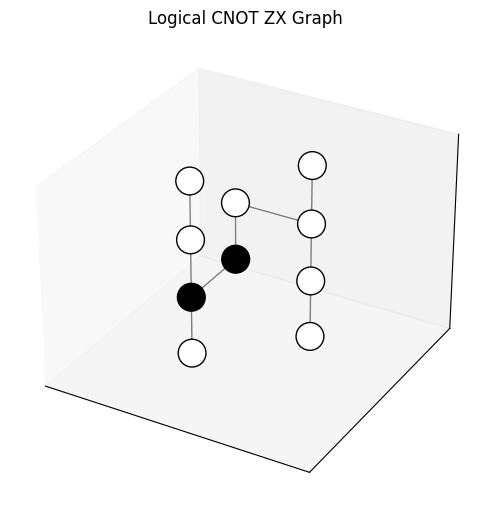

In [7]:
logical_cnot_zx_graph.draw()

In [8]:
logical_cnot_block_graph = logical_cnot_zx_graph.to_block_graph(
    "Logical CNOT Block Graph"
)
logical_cnot_block_graph.display()

### 2.4 Save the `BlockGraph` as a `.dae` file

After constructing the `BlockGraph`, we can save it as a `.dae` file and import it to SketchUp for further viewing or editing. Note that we can adjust the pipe length to show the model compactly or sparsely.

In [9]:
logical_cnot_block_graph.to_dae_file(
    "assets/logical_cnot_from_scratch.dae", pipe_length=3.0
)

### 2.5 Open ports in the block structure

We can place open ports in the block structure by adding virtual nodes to `ZXGraph` or `BlockGraph`. The open ports represent the input and output of the computation. Here we show how to add open ports to the logical CNOT gate.

In [10]:
open_logical_cnot_zx_graph = ZXGraph("Open Logical CNOT ZX Graph")
open_logical_cnot_zx_graph.add_virtual_node(Position3D(0, 0, 0))
open_logical_cnot_zx_graph.add_x_node(Position3D(0, 0, 1))
open_logical_cnot_zx_graph.add_z_node(Position3D(0, 0, 2))
open_logical_cnot_zx_graph.add_virtual_node(Position3D(0, 0, 3))
open_logical_cnot_zx_graph.add_x_node(Position3D(0, 1, 1))
open_logical_cnot_zx_graph.add_z_node(Position3D(0, 1, 2))
open_logical_cnot_zx_graph.add_virtual_node(Position3D(1, 1, 0))
open_logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 1))
open_logical_cnot_zx_graph.add_z_node(Position3D(1, 1, 2))
open_logical_cnot_zx_graph.add_virtual_node(Position3D(1, 1, 3))

open_logical_cnot_zx_graph.add_edge(Position3D(0, 0, 0), Position3D(0, 0, 1))
open_logical_cnot_zx_graph.add_edge(Position3D(0, 0, 1), Position3D(0, 0, 2))
open_logical_cnot_zx_graph.add_edge(Position3D(0, 0, 2), Position3D(0, 0, 3))
open_logical_cnot_zx_graph.add_edge(Position3D(0, 0, 1), Position3D(0, 1, 1))
open_logical_cnot_zx_graph.add_edge(Position3D(0, 1, 1), Position3D(0, 1, 2))
open_logical_cnot_zx_graph.add_edge(Position3D(0, 1, 2), Position3D(1, 1, 2))
open_logical_cnot_zx_graph.add_edge(Position3D(1, 1, 0), Position3D(1, 1, 1))
open_logical_cnot_zx_graph.add_edge(Position3D(1, 1, 1), Position3D(1, 1, 2))
open_logical_cnot_zx_graph.add_edge(Position3D(1, 1, 2), Position3D(1, 1, 3))

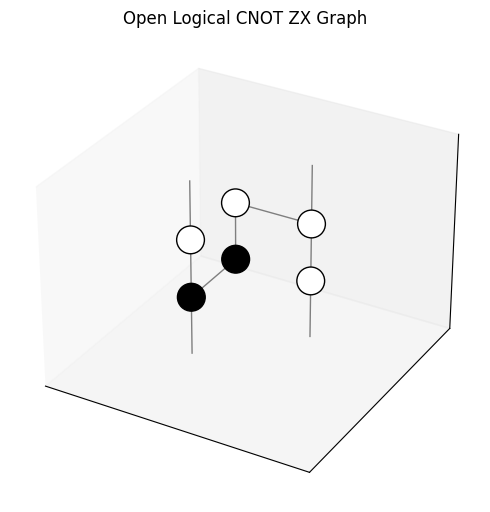

In [11]:
open_logical_cnot_zx_graph.draw()

In [12]:
open_logical_cnot_zx_graph.to_block_graph("Open Logical CNOT Block Graph").display(
    pipe_length=3.0
)

### 2.6 Hadamard Edge

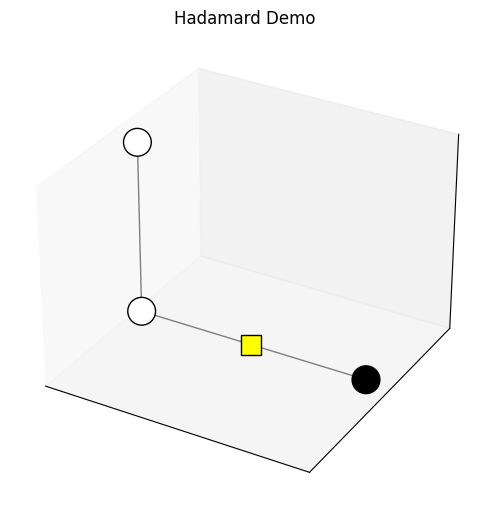

In [13]:
zx_graph_with_h = ZXGraph("Hadamard Demo")
zx_graph_with_h.add_z_node(Position3D(0, 0, 0))
zx_graph_with_h.add_x_node(Position3D(1, 0, 0))
zx_graph_with_h.add_edge(Position3D(0, 0, 0), Position3D(1, 0, 0), True)
zx_graph_with_h.add_z_node(Position3D(0, 0, 1))
zx_graph_with_h.add_edge(Position3D(0, 0, 0), Position3D(0, 0, 1), False)
zx_graph_with_h.draw()
zx_graph_with_h.to_block_graph().display()

### 2.7 Correlation Subgraphs from `ZXGraph`

Here a correlation subgraph is defined as a subgraph of the `ZXGraph` that represents the correlation surface within a 3D spacetime diagram. For the closed diagram, e.g. `logical_cnot_zx_graph`, the correlation subgraph represents the correlation between the measured logical observables. For the open diagram, e.g. `open_logical_cnot_zx_graph`, the correlation subgraph represents the correlation between the measured logical observables and the input/output observables, which can be combined with the expected stabilizer flow to verify the correctness of the computation.

Given a valid `ZXGraph`, we can construct all the correlation subgraphs by calling the `find_correlation_subgraphs` method. The method returns a list of `ZXGraph` objects, each representing a correlation subgraph.

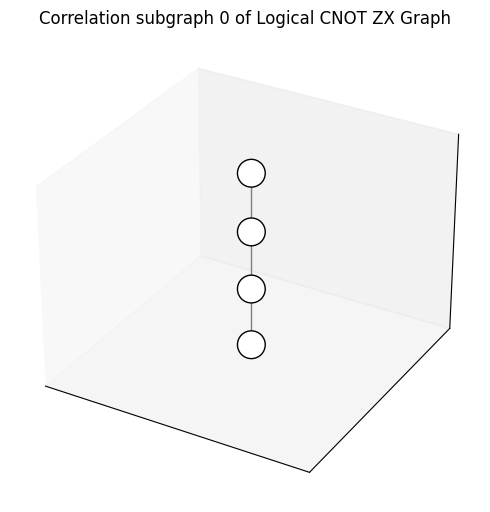

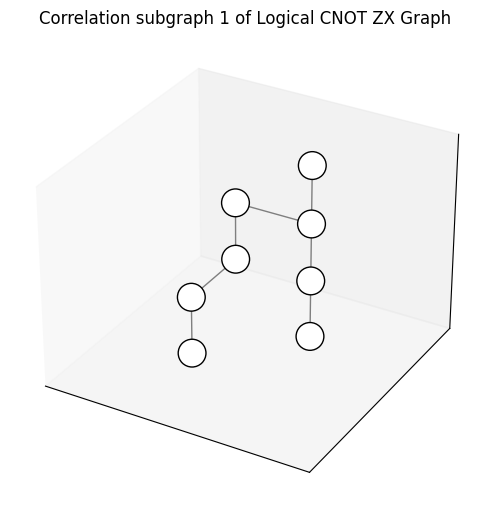

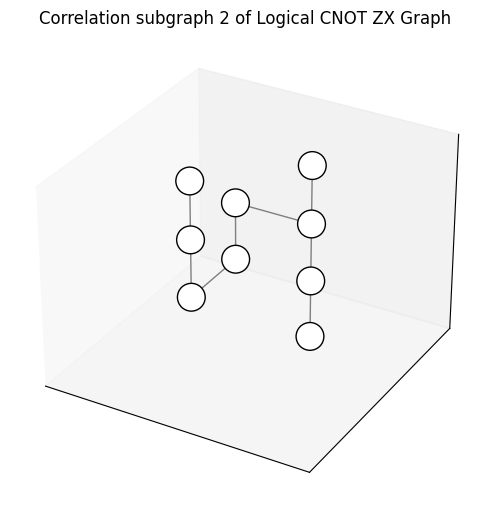

In [14]:
correlation_subgraphs = logical_cnot_zx_graph.find_correlation_subgraphs()
for subgraph in correlation_subgraphs:
    subgraph.draw()

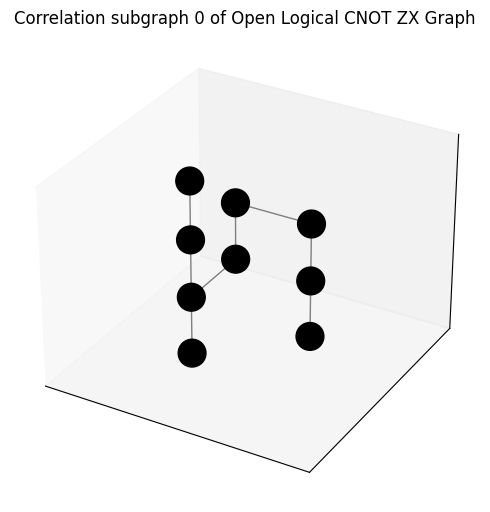

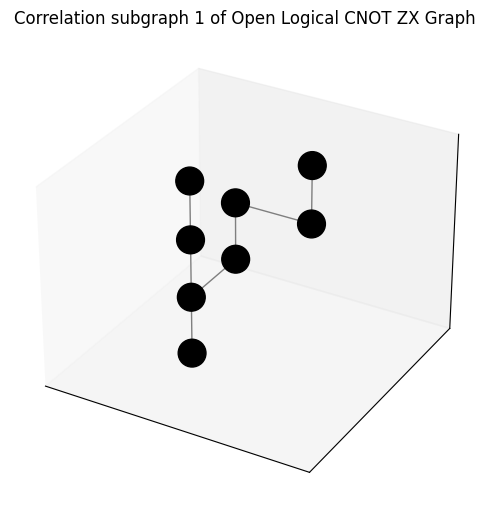

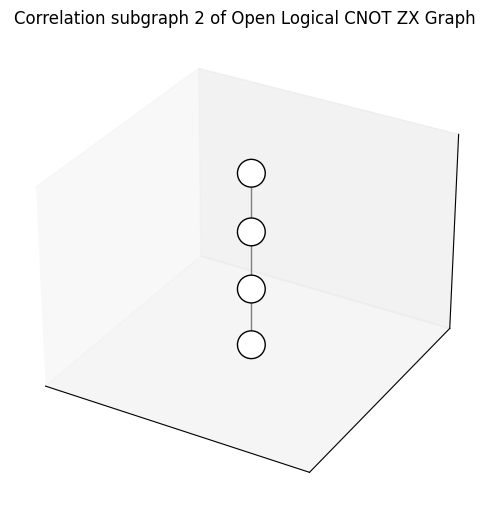

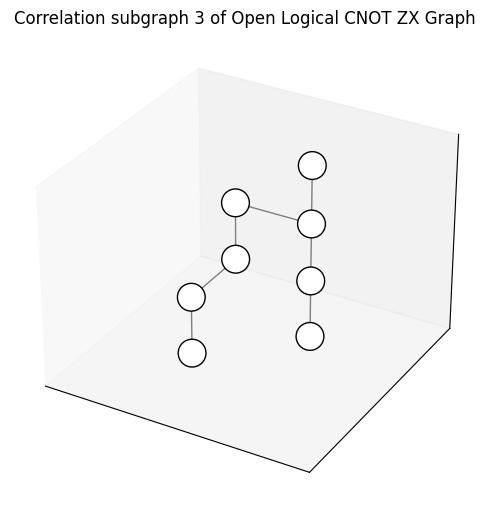

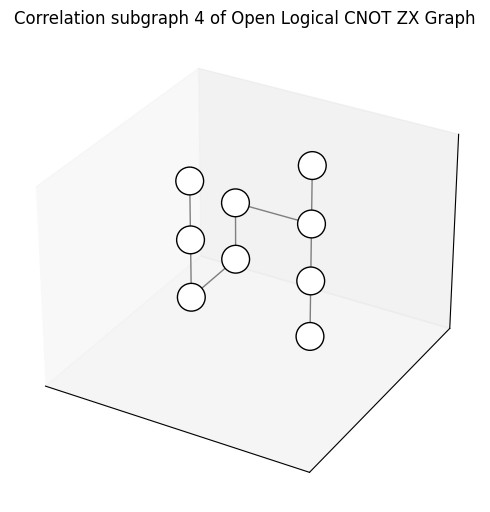

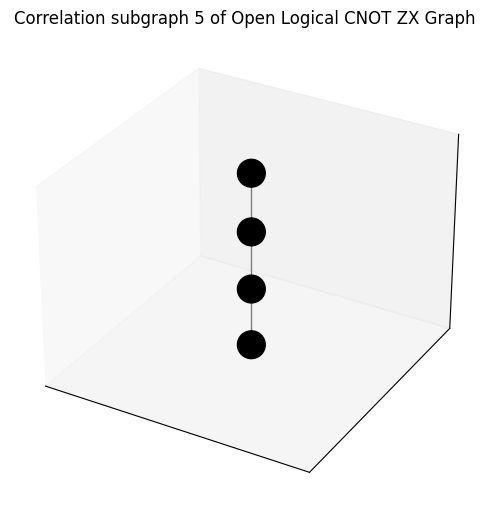

In [15]:
correlation_subgraphs = open_logical_cnot_zx_graph.find_correlation_subgraphs()
for subgraph in correlation_subgraphs:
    subgraph.draw()

We can alson show the correlation subgraph in the `ZXGraph` directly by calling the `draw()` method.

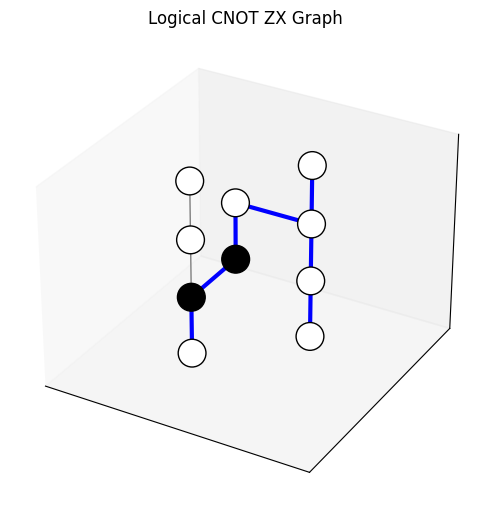

In [16]:
logical_cnot_zx_graph.draw(show_correlation_subgraph_index=1)

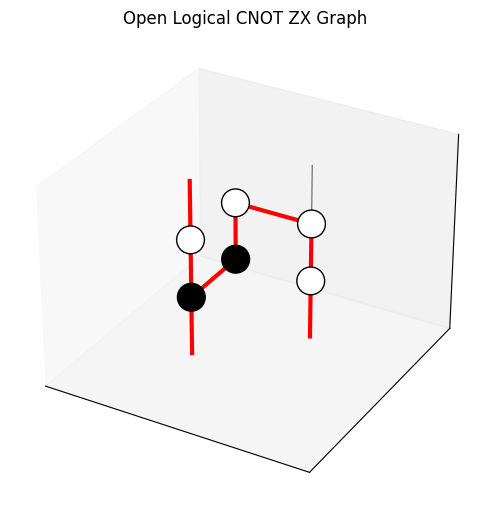

In [17]:
open_logical_cnot_zx_graph.draw(show_correlation_subgraph_index=0)

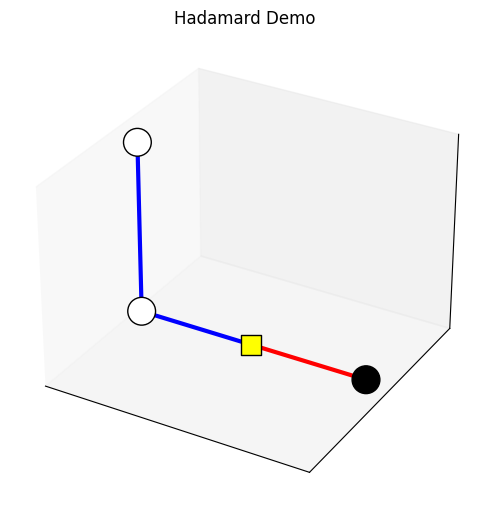

In [18]:
zx_graph_with_h.draw(show_correlation_subgraph_index=0)

## 2.8 Construct `AbstractObservable` from `BlockGraph`

In [19]:
read_block_graph.display()

In [21]:
read_block_graph.get_abstract_observables()

[AbstractObservable(top_lines=frozenset({Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.ZXZ: 'zxz'>)}), bottom_regions=frozenset()),
 AbstractObservable(top_lines=frozenset({Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), Pipe(u=Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), v=Cube(position=Position3D(x=1, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), pipe_type=<PipeType.OXZ: 'oxz'>), Cube(position=Position3D(x=1, y=1, z=3), cube_type=<CubeType.ZXZ: 'zxz'>)}), bottom_regions=frozenset({Pipe(u=Cube(position=Position3D(x=0, y=0, z=1), cube_type=<CubeType.ZXX: 'zxx'>), v=Cube(position=Position3D(x=0, y=1, z=1), cube_type=<CubeType.ZXX: 'zxx'>), pipe_type=<PipeType.ZOX: 'zox'>)})),
 AbstractObservable(top_lines=frozenset({Cube(position=Position3D(x=0, y=1, z=2), cube_type=<CubeType.ZXZ: 'zxz'>), Cube(position=Position3D(x=0, y=0, z=3), cube_type=<CubeType.ZXZ: 'zxz'>), Pipe(u=Cube(position=Position3D(x=0, y=1, z=2), cube_t